# Pyber Ride Sharing

### Analysis

Urban cities have 77.9% of Pyber drivers, 67.5% of total rides, and 62% of the total fares.  In this case correlation could mean causation; the data shows a relevant relationship between supply and demand.  Drivers > Riders > Fares could mean as more drivers enter the market, the fare price goes down; the market becomes more competitive for drivers.

Inversely to the first observable trend, the less competitive rural market results in fewer rides but higher average fares for these municipalities.

In terms of competition, the Suburban market was the best place to be a driver in 2016.  19% of Pyber drivers in these markets accounted for 31.4% of total fares.

In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import nbconvert

city = pd.read_csv("raw_data/city_data.csv")
ride = pd.read_csv("raw_data/ride_data.csv")

pyber = pd.merge(ride, city, left_on='city', right_on='city')
pyber.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


## Bubble Plot of Ride Sharing Data

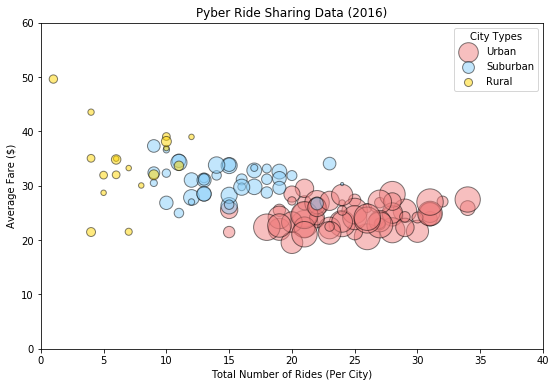

In [2]:
uavefare = pyber[pyber['type']=='Urban'].groupby(['city'])['fare'].mean()
utotride = pyber[pyber['type']=='Urban'].groupby(['city'])['ride_id'].count()
savefare = pyber[pyber['type']=='Suburban'].groupby(['city'])['fare'].mean()
stotride = pyber[pyber['type']=='Suburban'].groupby(['city'])['ride_id'].count()
ravefare = pyber[pyber['type']=='Rural'].groupby(['city'])['fare'].mean()
rtotride = pyber[pyber['type']=='Rural'].groupby(['city'])['ride_id'].count()

unumdriv = pyber[pyber['type']=='Urban'].groupby(['city'])['driver_count'].mean()
snumdriv = pyber[pyber['type']=='Suburban'].groupby(['city'])['driver_count'].mean()
rnumdriv = pyber[pyber['type']=='Rural'].groupby(['city'])['driver_count'].mean()

plt.figure(figsize=(9,6))
plt.ylim(0,60)
plt.xlim(0,40)
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.scatter(utotride,uavefare, s=unumdriv*10, c = 'LightCoral', edgecolor ='black', alpha = .5, label="Urban")
plt.scatter(stotride,savefare, s=snumdriv*10, c = 'LightSkyBlue', edgecolor ='black', alpha = .5, label="Suburban")
plt.scatter(rtotride,ravefare, s=rnumdriv*10, c = 'Gold', edgecolor ='black', alpha = .5, label="Rural")
plt.legend(title='City Types')
plt.show()

## Total Fares by City Type

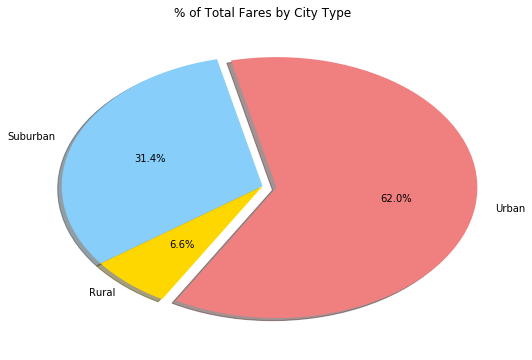

In [3]:
uavefare = pyber[pyber['type']=='Urban'].groupby(['city'])['fare'].sum()
savefare = pyber[pyber['type']=='Suburban'].groupby(['city'])['fare'].sum()
ravefare = pyber[pyber['type']=='Rural'].groupby(['city'])['fare'].sum()

plt.figure(figsize=(9,6))
plt.title('% of Total Fares by City Type')
plt.pie([uavefare.sum(),savefare.sum(),ravefare.sum()], explode=[0.07,0,0], labels=['Urban','Suburban','Rural'], colors=['lightcoral','lightskyblue','gold'],
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.show()

## Total Rides by City Type

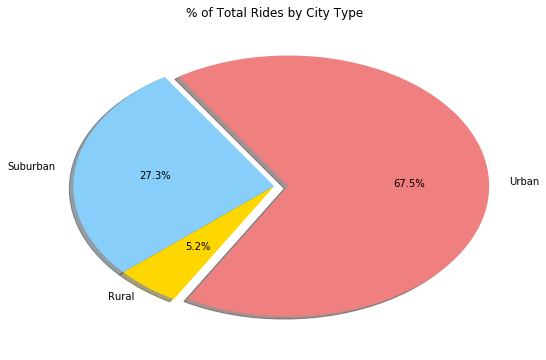

In [4]:
plt.figure(figsize=(9,6))
plt.title('% of Total Rides by City Type')
plt.pie([utotride.sum(),stotride.sum(),rtotride.sum()], explode=[0.07,0,0], labels=['Urban','Suburban','Rural'], colors=['lightcoral','lightskyblue','gold'],
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.show()

## Total Drivers by City Type

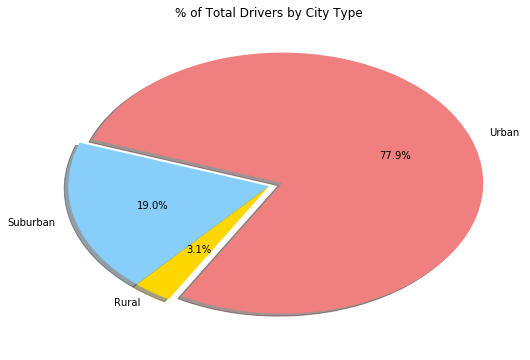

In [5]:
ud=pyber[pyber['type']=='Urban'].groupby(['city'])['driver_count'].first()
sd=pyber[pyber['type']=='Suburban'].groupby(['city'])['driver_count'].first()
rd=pyber[pyber['type']=='Rural'].groupby(['city'])['driver_count'].first()

plt.figure(figsize=(9,6))
plt.title('% of Total Drivers by City Type')
plt.pie([ud.sum(),sd.sum(),rd.sum()], explode=[0.07,0,0], labels=['Urban','Suburban','Rural'], colors=['lightcoral','lightskyblue','gold'],
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.show()